**Problem1-Leetcode#703-Kth Largest Element in a Stream-Easy**

Design a class to find the kth largest element in a stream. Note that it is the kth largest element in the sorted order, not the kth distinct element.

Implement KthLargest class:

KthLargest(int k, int[] nums) Initializes the object with the integer k and the stream of integers nums.
int add(int val) Appends the integer val to the stream and returns the element representing the kth largest element in the stream.
 

**Example 1:**

- Input
    - ["KthLargest", "add", "add", "add", "add", "add"]
    - [[3, [4, 5, 8, 2]], [3], [5], [10], [9], [4]]
- Output
    - [null, 4, 5, 5, 8, 8]

- Explanation
    -KthLargest kthLargest = new KthLargest(3, [4, 5, 8, 2]);
    -kthLargest.add(3);   // return 4
    -kthLargest.add(5);   // return 5
    -kthLargest.add(10);  // return 5
    -kthLargest.add(9);   // return 8
    -kthLargest.add(4);   // return 8
 

- Constraints:

    - 1 <= k <= 104
    - 0 <= nums.length <= 104
    - -104 <= nums[i] <= 104
    - -104 <= val <= 104
    - At most 104 calls will be made to add.
    - It is guaranteed that there will be at least k elements in the array when you search for the kth element.

In [ ]:
class KthLargest(object):
    def __init__(self, k, nums):
        self.k = k
        self.heap = nums
        heapq.heapify(self.heap)
        
        while len(self.heap) > k:
            heapq.heappop(self.heap)

    def add(self, val):
        heapq.heappush(self.heap, val)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
        return self.heap[0]

**Problem2-Leetcode#1046- Last Stone Weight-Easy**

You are given an array of integers stones where stones[i] is the weight of the ith stone.

We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. The result of this smash is:

If x == y, both stones are destroyed, and
If x != y, the stone of weight x is destroyed, and the stone of weight y has new weight y - x.
At the end of the game, there is at most one stone left.

Return the weight of the last remaining stone. If there are no stones left, return 0.

 

- Example 1:

    - Input: stones = [2,7,4,1,8,1]
    - Output: 1

- Explanation: 
    - We combine 7 and 8 to get 1 so the array converts to [2,4,1,1,1] then,
    - we combine 2 and 4 to get 2 so the array converts to [2,1,1,1] then,
    - we combine 2 and 1 to get 1 so the array converts to [1,1,1] then,
    - we combine 1 and 1 to get 0 so the array converts to [1] then that's the value of the last stone.
    
- Example 2:

    - Input: stones = [1]
    - Output: 1
 

- Constraints:

    - 1 <= stones.length <= 30
    - 1 <= stones[i] <= 1000

In [ ]:
class Solution(object):
    def lastStoneWeight(self, stones):
        for i in range(len(stones)):
            stones[i] *= -1
        heapq.heapify(stones)
        while len(stones) > 1:
            x = heapq.heappop(stones)
            y = heapq.heappop(stones)
            if x != y:
                    heapq.heappush(stones, x - y)
        return -heapq.heappop(stones) if stones else 0


**Problem3-Leetcode#973. K Closest Points to Origin-Medium**

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

- Example 1:
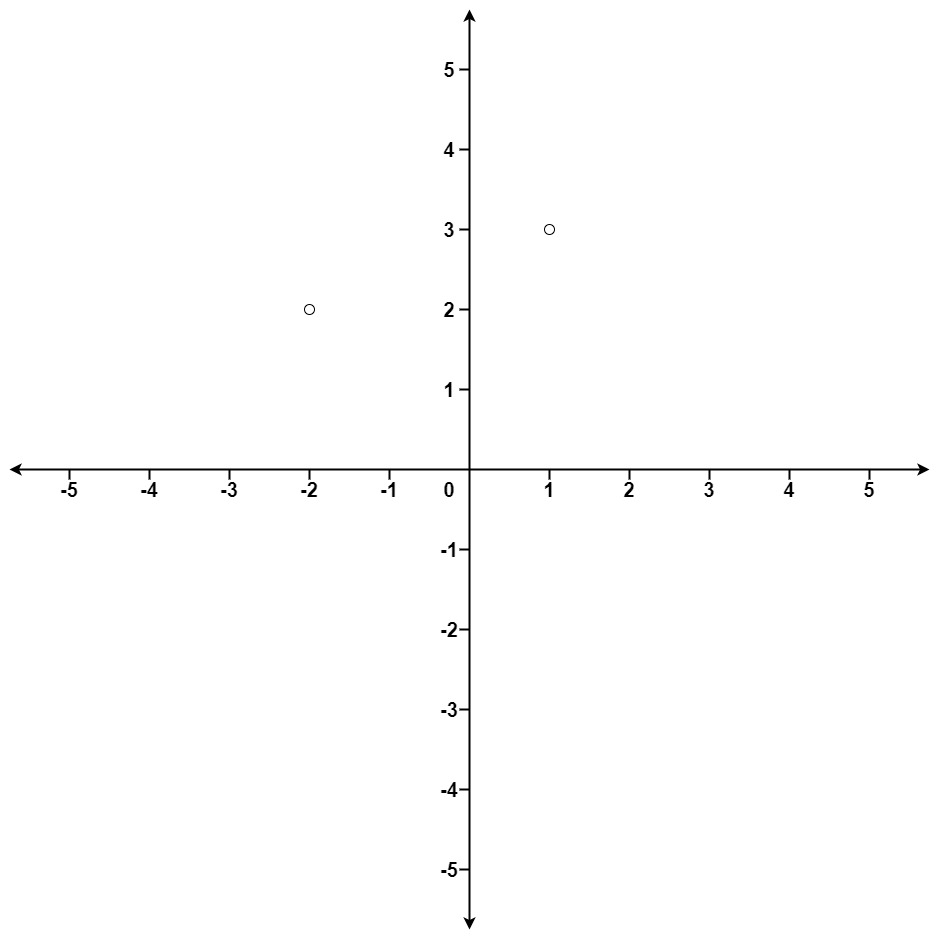
- Input: points = [[1,3],[-2,2]], k = 1
    - Output: [[-2,2]]
- Explanation:
    - The distance between (1, 3) and the origin is sqrt(10).
    - The distance between (-2, 2) and the origin is sqrt(8).
    - Since sqrt(8) < sqrt(10), (-2, 2) is closer to the origin.
    - We only want the closest k = 1 points from the origin, so the answer is just [[-2,2]].
- Example 2:

    - Input: points = [[3,3],[5,-1],[-2,4]], k = 2
    - Output: [[3,3],[-2,4]]
    - Explanation: The answer [[-2,4],[3,3]] would also be accepted.


In [ ]:
class Solution(object):
    def kClosest(self, points, k):
        heap = []
        for (x, y) in points:
            distance = x**2 + y**2  
            heapq.heappush(heap, (distance, [x, y]))  
          
        result = []
        for _ in range(k):
            distance, point = heapq.heappop(heap)  
            result.append(point) 
        
        return result

**Problem4-Leetcode#215. Kth Largest Element in an Array-Medium**

Given an integer array nums and an integer k, return the kth largest element in the array.

Note that it is the kth largest element in the sorted order, not the kth distinct element.

Can you solve it without sorting?

 

- Example 1:
    - Input: nums = [3,2,1,5,6,4], k = 2
    - Output: 5
    
- Example 2:
    - Input: nums = [3,2,3,1,2,4,5,5,6], k = 4
    - Output: 4


In [ ]:
class Solution(object):
    def findKthLargest(self, nums, k):
        heap = nums[:k]
        heapq.heapify(heap)
        
        for num in nums[k:]:
            if num > heap[0]:  
                heapq.heapreplace(heap, num)  
        
        return heap[0]